In [15]:
import yfinance as yf
import quantstats
import pandas as pd

[*********************100%***********************]  15 of 15 completed


c:\Python310\lib\site-packages\quantstats\stats.py:942: UserWarning: Pandas DataFrame was passed (Series expeted). Only first column will be used.
  warn("Pandas DataFrame was passed (Series expeted). "
c:\Python310\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


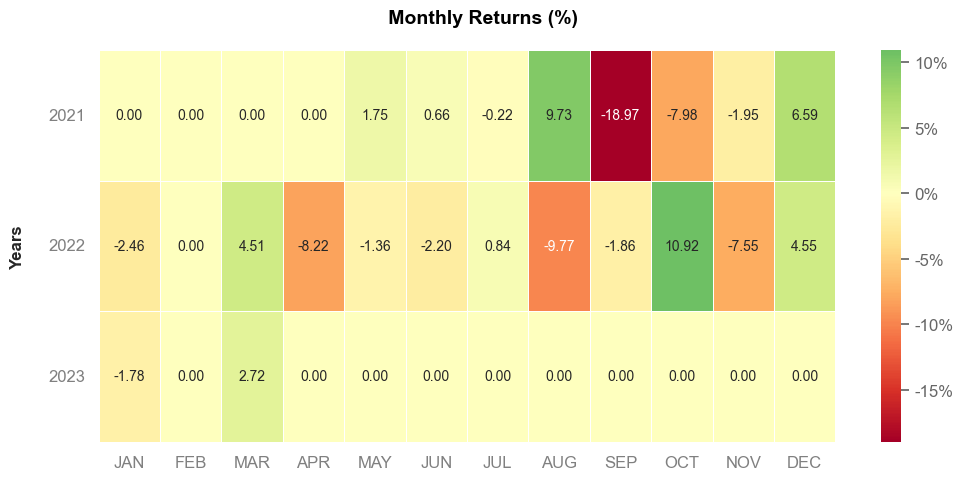

In [18]:
acoes = ['PETR4.SA', 'ITSA4.SA', 'BRAP3.SA', 'BRAP4.SA', 'QUAL3.SA', 'VBBR3.SA', 'WIZS3.SA', 'BRSR6.SA', 'AESB3.SA', 'CSMG3.SA', 'BRIV4.SA', 'VALE3.SA', 'TRPL4.SA', 'VIVT3.SA', 'SUZB3.SA']
cotacoes = yfinance.download(acoes, interval="1mo")['Adj Close']

retornos = cotacoes.pct_change().dropna()

quantstats.extend_pandas()
retornos.plot_monthly_heatmap()

[*********************100%***********************]  14 of 14 completed


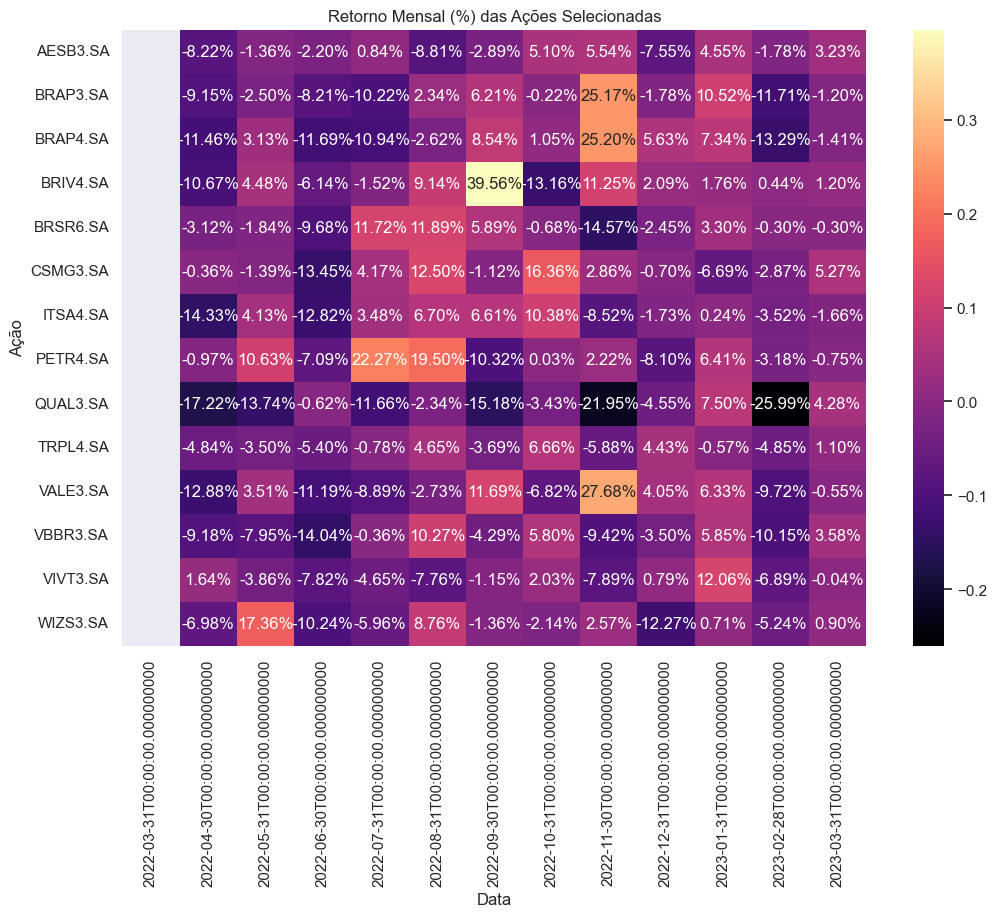

In [32]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definir as ações de interesse
acoes = ['PETR4.SA', 'ITSA4.SA', 'BRAP3.SA', 'BRAP4.SA', 'QUAL3.SA', 'VBBR3.SA', 'WIZS3.SA', 'BRSR6.SA', 'AESB3.SA', 'CSMG3.SA', 'BRIV4.SA', 'VALE3.SA', 'TRPL4.SA', 'VIVT3.SA']

# Definir as datas de interesse (últimos 5 anos)
data_inicio = '2022-03-13'
data_fim = '2023-03-11'

# Coletar os dados do Yahoo Finance para as ações e período definidos
df_precos = yf.download(acoes, start=data_inicio, end=data_fim)['Adj Close']
df_precos = df_precos.dropna()

# Calcular o retorno mensal das ações
df_retornos_mensais = df_precos.resample('M').last().pct_change()

# Plotar o heatmap
sns.set()
plt.figure(figsize=(12, 8))
sns.heatmap(df_retornos_mensais.T, cmap='magma', annot=True, fmt='.2%')
plt.title('Retorno Mensal (%) das Ações Selecionadas')
plt.xlabel('Data')
plt.ylabel('Ação')
plt.show()

In [37]:
!pip install cvxopt

     ---------------------------------------- 12.7/12.7 MB 1.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import numpy as np
import pandas as pd
import yfinance as yf
from cvxopt import matrix, solvers

# Lista de ações
acoes = ['PETR4.SA', 'ITSA4.SA', 'BRAP3.SA', 'BRAP4.SA', 'QUAL3.SA', 'VBBR3.SA', 'WIZS3.SA', 'BRSR6.SA', 'AESB3.SA', 'CSMG3.SA', 'BRIV4.SA', 'VALE3.SA', 'TRPL4.SA', 'VIVT3.SA']

# Obter dados do Yahoo Finance
dados = yf.download(acoes, start='2015-01-01', end='2022-03-11')

# Obter retornos diários
retornos = dados['Adj Close'].pct_change().dropna()

# Calcular a matriz de covariância dos retornos
cov = retornos.cov()

# Número de ativos
n = len(acoes)

# Matriz de retornos esperados
r = np.array(retornos.mean())

# Matriz de pesos
w = matrix(0.0, (n, 1))

# Matriz de limites
G = matrix(np.concatenate((-np.eye(n), np.eye(n)), axis=0))

# Vetor de limites
h = matrix(np.concatenate((np.zeros(n), np.ones(n))))

# Matriz de covariância
P = matrix(cov.values)

# Vetor de retornos esperados
q = matrix(r)

# Resolver o problema de otimização quadrática
sol = solvers.qp(P, q, G, h)

# Obter alocação ótima de ativos
w_opt = np.array(sol['x'])

# Imprimir alocação ótima de ativos
for i in range(n):
    print(acoes[i], round(w_opt[i][0], 2))

[*********************100%***********************]  14 of 14 completed
     pcost       dcost       gap    pres   dres
 0:  4.6440e-03 -1.4020e+01  1e+01  4e-17  8e-16
 1:  4.6253e-03 -1.5994e-01  2e-01  2e-16  8e-16
 2:  3.3174e-03 -1.5622e-02  2e-02  1e-16  9e-17
 3: -1.0141e-03 -4.1463e-03  3e-03  2e-16  9e-18
 4: -2.7376e-03 -3.0284e-03  3e-04  2e-16  1e-18
 5: -2.8908e-03 -2.9051e-03  1e-05  2e-16  7e-19
 6: -2.8980e-03 -2.8999e-03  2e-06  2e-16  1e-18
 7: -2.8995e-03 -2.8996e-03  7e-08  2e-16  1e-18
Optimal solution found.
PETR4.SA 1.0
ITSA4.SA 0.19
BRAP3.SA 0.0
BRAP4.SA 0.0
QUAL3.SA 0.0
VBBR3.SA 0.0
WIZS3.SA 0.0
BRSR6.SA 0.0
AESB3.SA 1.0
CSMG3.SA 0.0
BRIV4.SA 0.0
VALE3.SA 0.0
TRPL4.SA 0.0
VIVT3.SA 0.0


In [39]:
!pip install bcdata
import pandas as pd
import bcdata

# Definir período de consulta
start_date = '2000-01-01'
end_date = '2022-03-11'

# Obter os dados do IPCA (inflação)
ipca = bcdata.fetch_bcb('13522', start_date, end_date)
ipca.index = pd.to_datetime(ipca.index, format='%Y-%m-%d')

# Obter os dados da SELIC (taxa de juros)
selic = bcdata.fetch_bcb('11', start_date, end_date)
selic.index = pd.to_datetime(selic.index, format='%Y-%m-%d')

     -------------------------------------- 219.6/219.6 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 43.1/43.1 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 22.3/22.3 MB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 21.9/21.9 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 6.6 MB/s eta 0:00:00
  Using cached PyYAML-6.0-cp310-cp310-win_amd64.whl (151 kB)
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.2
    Uninstalling SQLAlchemy-2.0.2:
      Successfully uninstalled SQLAlchemy-2.0.2


ERROR: Could not install packages due to an OSError: [WinError 2] O sistema não pode encontrar o arquivo especificado: 'C:\\Python310\\Scripts\\pyproj.exe' -> 'C:\\Python310\\Scripts\\pyproj.exe.deleteme'


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'bcdata'